In [47]:
import gym
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def evaluate_policy(env, agent):
    s_k, info = env.reset(seed=cfg_params["random_seed"])
    terminated = False
    sum_reward = 0
    for _ in range(cfg_params["max_episode_steps"]):
        a_k = agent.optimal_action(s_k)
        s_k1, r_k, terminated, _ , info = env.step(a_k)
        sum_reward += r_k
        s_k = s_k1
        if terminated:
            break
    return sum_reward
    

In [49]:
class Agent():
    def __init__(self, action_dim: int, state_dim: int, alpha=0.01, gamma=0.9, epsilon=0.1):
        self.action_dim = action_dim
        self.state_dim = state_dim
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = np.zeros((state_dim, action_dim))  # 查表法 action value: Q(s, a)
    
    def select_action(self, s_k: int) -> int:
        '''use e-greedy policy'''
        self.optimal_action
        if np.random.uniform(0, 1) > self.epsilon:
            a_k = self.optimal_action(s_k)
        else:
            a_k = np.random.choice(self.action_dim)
        return a_k
    
    def optimal_action(self, s_k: int) -> int:
        Q_sk = self.Q[s_k, :]
        optimal_action_list = np.where(Q_sk == np.max(Q_sk))[0]
        return np.random.choice(optimal_action_list)
    
    def other_action(self, s_k: int) -> int:
        Q_sk = self.Q[s_k, :]
        other_action_list = np.where(Q_sk != np.max(Q_sk))[0]
        return np.random.choice(other_action_list)
    
    def train(self, s_k, a_k, r_k, s_k1):
        # policy evaluation
        self.Q[s_k, a_k] -= self.alpha*(self.Q[s_k, a_k] - (r_k + self.gamma*self.Q[s_k1, self.select_action(s_k1)]))
#         print(self.Q[s_k, a_k])

        

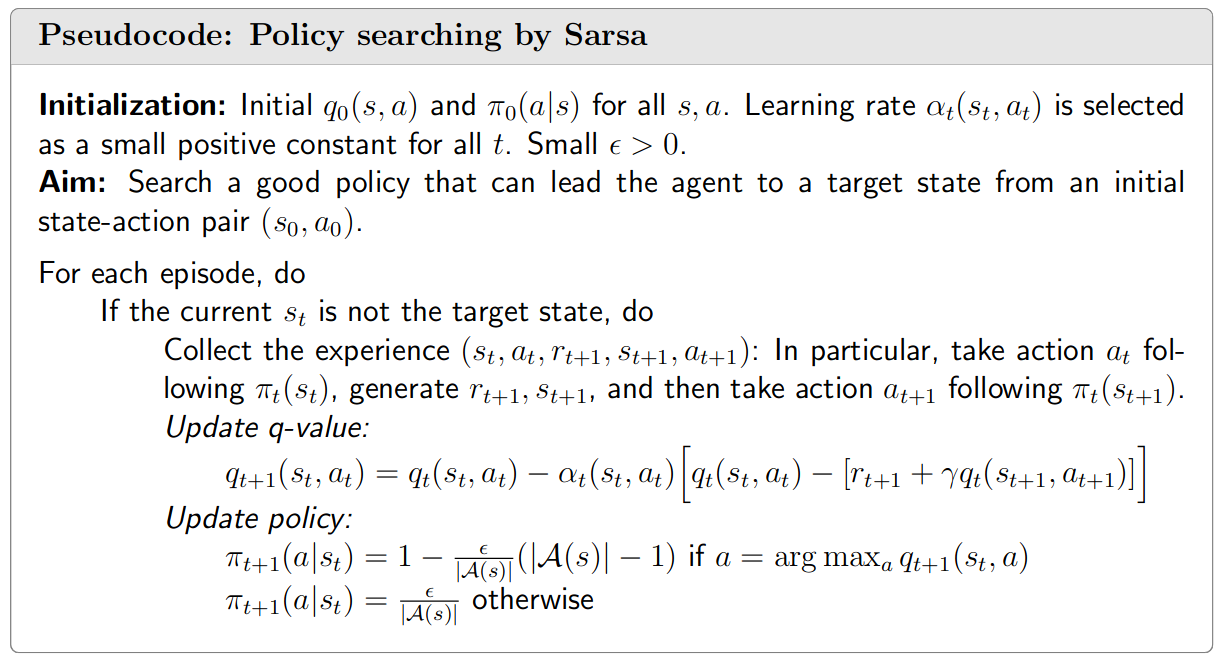

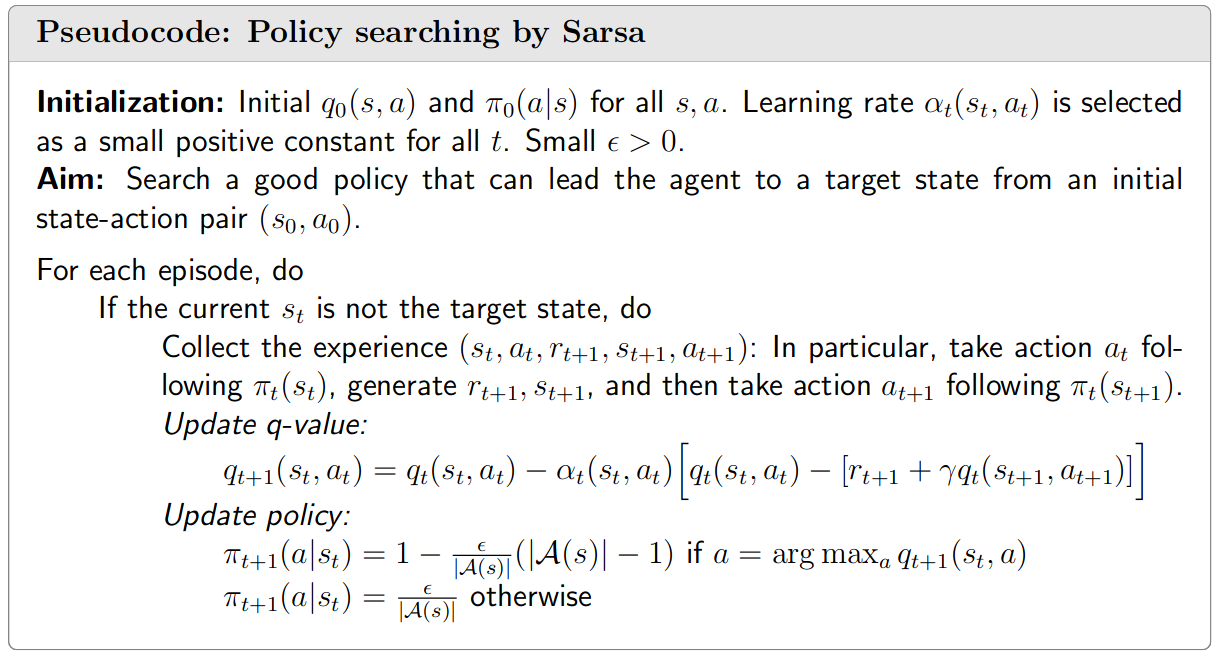

In [50]:
# parameter
cfg_params = {
    "env_name" : "FrozenLake-v1",
    "random_seed": 0,
    "max_train_steps": 1000,
    "max_episode_steps": 500,
}

env = gym.make(cfg_params["env_name"], desc=None, map_name="4x4", is_slippery=False) #  gym.make("CliffWalking-v0", render_mode="human")


In [51]:
# make it as a funtion for data analysis


agent = Agent(
    action_dim=env.action_space.n,
    state_dim=env.observation_space.n,
    alpha=0.1,
    gamma=0.9,
    epsilon=0.01)

# training
score_queue = []

for k in range(cfg_params["max_train_steps"]):
    # reset t  he s_k
    data_queue = []
    s_k, info = env.reset(seed=cfg_params["random_seed"])
    # collect data set
    for ek in range(cfg_params["max_episode_steps"]):
        a_k = agent.select_action(s_k)
        s_k1, r_k, terminated, truncated, info = env.step(a_k)
        agent.train(s_k, a_k, r_k, s_k1)
        if terminated:
#             print(f"s_k: {s_k}, s_k1: {s_k1}, r_k: {r_k}, a_k: {a_k}, e_k : {ek}, terminated: {terminated}")
            break
        
        s_k = s_k1
                
    score = evaluate_policy(env, agent)
    score_queue.append(score)
    print(f'current step: {k}/{cfg_params["max_train_steps"]}, score: {score}')


current step: 0/1000, score: 0.0
current step: 1/1000, score: 0.0
current step: 2/1000, score: 0.0
current step: 3/1000, score: 0.0
current step: 4/1000, score: 0.0
current step: 5/1000, score: 1.0
current step: 6/1000, score: 0.0
current step: 7/1000, score: 1.0
current step: 8/1000, score: 0.0
current step: 9/1000, score: 0.0
current step: 10/1000, score: 1.0
current step: 11/1000, score: 0.0
current step: 12/1000, score: 0.0
current step: 13/1000, score: 0.0
current step: 14/1000, score: 0.0
current step: 15/1000, score: 0.0
current step: 16/1000, score: 0.0
current step: 17/1000, score: 0.0
current step: 18/1000, score: 0.0
current step: 19/1000, score: 0.0
current step: 20/1000, score: 0.0
current step: 21/1000, score: 0.0
current step: 22/1000, score: 0.0
current step: 23/1000, score: 0.0
current step: 24/1000, score: 0.0
current step: 25/1000, score: 0.0
current step: 26/1000, score: 0.0
current step: 27/1000, score: 0.0
current step: 28/1000, score: 0.0
current step: 29/1000, s

current step: 249/1000, score: 1.0
current step: 250/1000, score: 1.0
current step: 251/1000, score: 1.0
current step: 252/1000, score: 1.0
current step: 253/1000, score: 1.0
current step: 254/1000, score: 1.0
current step: 255/1000, score: 1.0
current step: 256/1000, score: 1.0
current step: 257/1000, score: 1.0
current step: 258/1000, score: 1.0
current step: 259/1000, score: 1.0
current step: 260/1000, score: 1.0
current step: 261/1000, score: 1.0
current step: 262/1000, score: 1.0
current step: 263/1000, score: 1.0
current step: 264/1000, score: 1.0
current step: 265/1000, score: 1.0
current step: 266/1000, score: 1.0
current step: 267/1000, score: 1.0
current step: 268/1000, score: 1.0
current step: 269/1000, score: 1.0
current step: 270/1000, score: 1.0
current step: 271/1000, score: 1.0
current step: 272/1000, score: 1.0
current step: 273/1000, score: 1.0
current step: 274/1000, score: 1.0
current step: 275/1000, score: 1.0
current step: 276/1000, score: 1.0
current step: 277/10

current step: 506/1000, score: 1.0
current step: 507/1000, score: 1.0
current step: 508/1000, score: 1.0
current step: 509/1000, score: 1.0
current step: 510/1000, score: 1.0
current step: 511/1000, score: 1.0
current step: 512/1000, score: 1.0
current step: 513/1000, score: 1.0
current step: 514/1000, score: 1.0
current step: 515/1000, score: 1.0
current step: 516/1000, score: 1.0
current step: 517/1000, score: 1.0
current step: 518/1000, score: 1.0
current step: 519/1000, score: 1.0
current step: 520/1000, score: 1.0
current step: 521/1000, score: 1.0
current step: 522/1000, score: 1.0
current step: 523/1000, score: 1.0
current step: 524/1000, score: 1.0
current step: 525/1000, score: 1.0
current step: 526/1000, score: 1.0
current step: 527/1000, score: 1.0
current step: 528/1000, score: 1.0
current step: 529/1000, score: 1.0
current step: 530/1000, score: 1.0
current step: 531/1000, score: 1.0
current step: 532/1000, score: 1.0
current step: 533/1000, score: 1.0
current step: 534/10

current step: 787/1000, score: 1.0
current step: 788/1000, score: 1.0
current step: 789/1000, score: 1.0
current step: 790/1000, score: 1.0
current step: 791/1000, score: 1.0
current step: 792/1000, score: 1.0
current step: 793/1000, score: 1.0
current step: 794/1000, score: 1.0
current step: 795/1000, score: 1.0
current step: 796/1000, score: 1.0
current step: 797/1000, score: 1.0
current step: 798/1000, score: 1.0
current step: 799/1000, score: 1.0
current step: 800/1000, score: 1.0
current step: 801/1000, score: 1.0
current step: 802/1000, score: 1.0
current step: 803/1000, score: 1.0
current step: 804/1000, score: 1.0
current step: 805/1000, score: 1.0
current step: 806/1000, score: 1.0
current step: 807/1000, score: 1.0
current step: 808/1000, score: 1.0
current step: 809/1000, score: 1.0
current step: 810/1000, score: 1.0
current step: 811/1000, score: 1.0
current step: 812/1000, score: 1.0
current step: 813/1000, score: 1.0
current step: 814/1000, score: 1.0
current step: 815/10

In [52]:
agent.Q

array([[0.0513912 , 0.        , 0.55581039, 0.20666899],
       [0.17236785, 0.        , 0.56995504, 0.10514374],
       [0.19829073, 0.69643018, 0.        , 0.06328943],
       [0.06346827, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.77476367, 0.        , 0.06513542],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.14695692, 0.        ],
       [0.00663385, 0.88190567, 0.        , 0.24170718],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.171     , 0.        ],
       [0.0081    , 0.2329581 , 1.        , 0.21668087],
       [0.        , 0.        , 0.        , 0.        ]])

In [53]:
evaluate_env = gym.make(cfg_params["env_name"], render_mode="human",desc=None, map_name="4x4", is_slippery=False)
evaluate_policy(evaluate_env, agent)

1.0